## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline


In [2]:
cabbage = pd.read_csv('cabbage_merge.csv',encoding='cp949')
print('배추 데이타셋 크기 :',cabbage.shape)
cabbage.head()

배추 데이타셋 크기 : (665, 20)


,일시,품목,품종,광역산지,일별 도매가격(원/kg) 평균,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,고랭지배추:면적 (ha),10a당 생산량 (kg),생산량 (톤),2달 평균기온(°C),2달 평균최저기온(°C),2달 평균최고기온(°C),일강수량(mm),2달 평균 풍속(m/s),2달 평균 상대습도(%),2달 평균 합계일조시간(hr),연도,월,일
0,2014-07-08,배추,고냉지배추,강원,500.000000,0.190000,0.38,4579,3525,161410,21.181967,17.434426,25.086885,1.477049,1.960656,64.878689,5.842623,2014,7,8
1,2014-07-09,배추,고냉지배추,강원,581.000000,0.190000,0.32,4579,3525,161410,21.381967,17.663934,25.318033,1.927869,1.952459,65.352459,5.714754,2014,7,9
2,2014-07-10,배추,고냉지배추,강원,624.000000,0.320000,0.51,4579,3525,161410,21.537705,17.901639,25.411475,1.927869,1.949180,65.834426,5.606557,2014,7,10
3,2014-07-24,배추,고냉지배추,강원,828.666667,5.113333,19.30,4579,3525,161410,23.577049,20.121311,27.290164,2.309836,1.988525,65.408197,5.724590,2014,7,24
4,2014-07-25,배추,고냉지배추,강원,736.000000,6.990000,9.50,4579,3525,161410,23.575410,20.149180,27.336066,2.480328,1.972131,66.034426,5.709836,2014,7,25


In [4]:
# cabbage = cabbage.drop('Unnamed: 0',axis=1)

In [5]:
cabbage.head()

,일시,품목,품종,광역산지,일별 도매가격(원/kg) 평균,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,고랭지배추:면적 (ha),10a당 생산량 (kg),생산량 (톤),2달 평균기온(°C),2달 평균최저기온(°C),2달 평균최고기온(°C),일강수량(mm),2달 평균 풍속(m/s),2달 평균 상대습도(%),2달 평균 합계일조시간(hr),연도,월,일
0,2014-07-08,배추,고냉지배추,강원,500.000000,0.190000,0.38,4579,3525,161410,21.181967,17.434426,25.086885,1.477049,1.960656,64.878689,5.842623,2014,7,8
1,2014-07-09,배추,고냉지배추,강원,581.000000,0.190000,0.32,4579,3525,161410,21.381967,17.663934,25.318033,1.927869,1.952459,65.352459,5.714754,2014,7,9
2,2014-07-10,배추,고냉지배추,강원,624.000000,0.320000,0.51,4579,3525,161410,21.537705,17.901639,25.411475,1.927869,1.949180,65.834426,5.606557,2014,7,10
3,2014-07-24,배추,고냉지배추,강원,828.666667,5.113333,19.30,4579,3525,161410,23.577049,20.121311,27.290164,2.309836,1.988525,65.408197,5.724590,2014,7,24
4,2014-07-25,배추,고냉지배추,강원,736.000000,6.990000,9.50,4579,3525,161410,23.575410,20.149180,27.336066,2.480328,1.972131,66.034426,5.709836,2014,7,25


In [6]:
cabbage1 = cabbage.set_index("일시")
cabbage1.head()

,품목,품종,광역산지,일별 도매가격(원/kg) 평균,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,고랭지배추:면적 (ha),10a당 생산량 (kg),생산량 (톤),2달 평균기온(°C),2달 평균최저기온(°C),2달 평균최고기온(°C),일강수량(mm),2달 평균 풍속(m/s),2달 평균 상대습도(%),2달 평균 합계일조시간(hr),연도,월,일
일시,,,,,,,,,,,,,,,,,,,
2014-07-08,배추,고냉지배추,강원,500.000000,0.190000,0.38,4579,3525,161410,21.181967,17.434426,25.086885,1.477049,1.960656,64.878689,5.842623,2014,7,8
2014-07-09,배추,고냉지배추,강원,581.000000,0.190000,0.32,4579,3525,161410,21.381967,17.663934,25.318033,1.927869,1.952459,65.352459,5.714754,2014,7,9
2014-07-10,배추,고냉지배추,강원,624.000000,0.320000,0.51,4579,3525,161410,21.537705,17.901639,25.411475,1.927869,1.949180,65.834426,5.606557,2014,7,10
2014-07-24,배추,고냉지배추,강원,828.666667,5.113333,19.30,4579,3525,161410,23.577049,20.121311,27.290164,2.309836,1.988525,65.408197,5.724590,2014,7,24
2014-07-25,배추,고냉지배추,강원,736.000000,6.990000,9.50,4579,3525,161410,23.575410,20.149180,27.336066,2.480328,1.972131,66.034426,5.709836,2014,7,25


C:\Users\bommy\anaconda3\envs\bommy\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bommy\anaconda3\envs\bommy\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


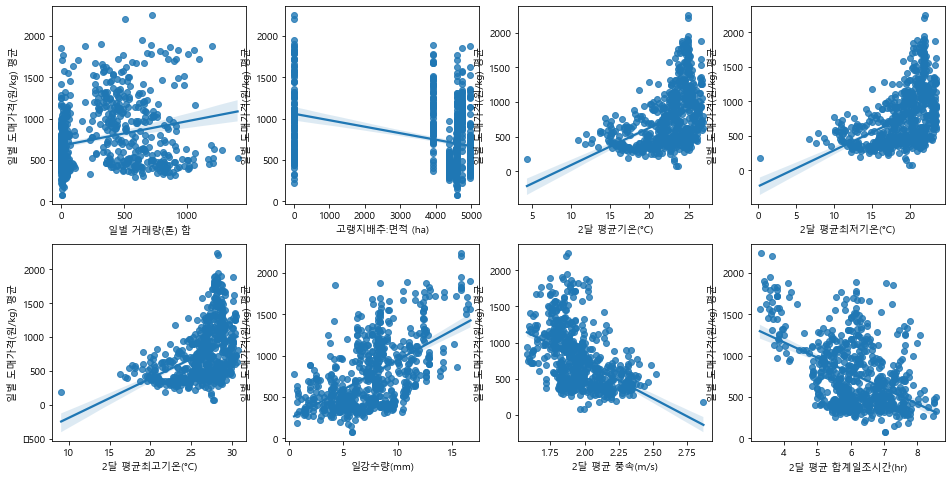

In [7]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['일별 거래량(톤) 합','고랭지배추:면적 (ha)','2달 평균기온(°C)','2달 평균최저기온(°C)','2달 평균최고기온(°C)','일강수량(mm)','2달 평균 풍속(m/s)','2달 평균 합계일조시간(hr)']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='일별 도매가격(원/kg) 평균',data=cabbage , ax=axs[row][col])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = cabbage1['일별 도매가격(원/kg) 평균']
X_data = cabbage1.drop(['일별 도매가격(원/kg) 평균','품목','품종','광역산지','연도','월','일'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 33707.474 , RMSE : 183.596
Variance score : 0.774


In [9]:
# MinMaxScaler을 통한 스케일링
scaler = MinMaxScaler()
# X scaler 생성
x = scaler.fit_transform(X_data)
# Y scaler 생성
yscaler = scaler.fit(y_target.values.reshape(-1,1))

# 스케일링 적용
#X = Xscaler.transform(X)
y = yscaler.transform(y_target.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [11]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 663.5821415047908
회귀 계수값: [ 9.600e+00 -5.000e-01 -1.000e-01  1.000e-01 -0.000e+00 -3.049e+02
  1.177e+02  2.389e+02  3.130e+01 -1.454e+02 -1.560e+01 -5.800e+01]


In [12]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

2달 평균최고기온(°C)       238.9
2달 평균최저기온(°C)       117.7
일강수량(mm)             31.3
일별 거래금액(백만원) 평균       9.6
10a당 생산량 (kg)         0.1
생산량 (톤)              -0.0
고랭지배추:면적 (ha)        -0.1
일별 거래량(톤) 합          -0.5
2달 평균 상대습도(%)       -15.6
2달 평균 합계일조시간(hr)    -58.0
2달 평균 풍속(m/s)      -145.4
2달 평균기온(°C)        -304.9
dtype: float64

In [13]:
from sklearn.model_selection import cross_val_score

y_target = cabbage1['일별 도매가격(원/kg) 평균']
X_data = cabbage1.drop(['일별 도매가격(원/kg) 평균','품목','품종','광역산지','연도','월','일'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-7.43084000e+04 -1.33819040e+05 -9.01224800e+04 -1.05939870e+05
 -7.58681279e+07]
 5 folds 의 개별 RMSE scores :  [ 272.6   365.81  300.2   325.48 8710.23]
 5 folds 의 평균 RMSE : 1994.866 


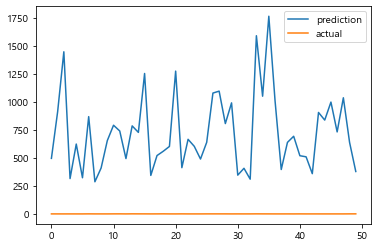

In [14]:
plt.plot(y_preds[:50],label='prediction')
plt.plot(y_test[:50], label='actual')
plt.legend()
plt.show()

In [ ]:
##--> RMSE 값이 매우 높음..